# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [5]:
# load json as string
json.load((open('Desktop/Springboard/5.2 data_wrangling_json/data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [6]:
# load as Pandas dataframe
sample_json_df = pd.read_json('Desktop/Springboard/5.2 data_wrangling_json/data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

#### Question 1
    1. Find the 10 countries with most projects

In [8]:

data=pd.DataFrame(json.load((open('Desktop/Springboard/5.2 data_wrangling_json/data/world_bank_projects.json')))).countryshortname.value_counts().head(10)
data

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64

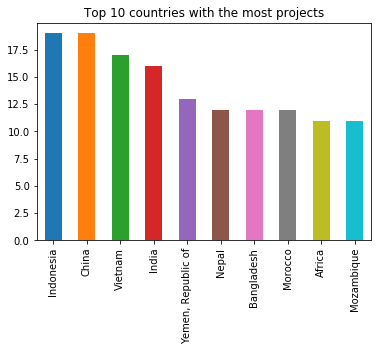

In [12]:
data.plot(kind='bar',title='Top 10 countries with the most projects')
plt.show()

In [21]:
# Method 2
# load json file into 'json_all'
json_all = pd.read_json('Desktop/Springboard/5.2 data_wrangling_json/data/world_bank_projects.json')

## Data Exploration 
col = json_all.columns
num_rows = len(json_all)

# print(col)         # explore the column names
# print(num_rows)    # 500 rows of data

# Make new dataframe with columns of our interest and groupby 'countryname' column 
# aggfunc = .count()

new_df = json_all[['countrycode','country_namecode','countryname','countryshortname']]
grouped = new_df.groupby('countryname').count()

# check to see all the columns have the same information across rows by comparing the values in each column across rows
check_equality = (grouped['countrycode'] == grouped['country_namecode']).all()
check_equality_2 = (grouped['countryshortname'] == grouped['country_namecode']).all()

# print statement for readability 
print("Are all the values between 'countrycode' column and 'country_namecode' column same? {}\n\
Are all the values between 'countryshortname' column and 'country_namecode' column same? {}" \
.format(check_equality, check_equality_2))

# Answer (top 10 countries with most projects)
sorted_df = grouped.sort_values(by=['countrycode'], ascending=False)
sorted_df.head(10)

Are all the values between 'countrycode' column and 'country_namecode' column same? True
Are all the values between 'countryshortname' column and 'country_namecode' column same? True


,countrycode,country_namecode,countryshortname
countryname,,,
People's Republic of China,19,19,19
Republic of Indonesia,19,19,19
Socialist Republic of Vietnam,17,17,17
Republic of India,16,16,16
Republic of Yemen,13,13,13
People's Republic of Bangladesh,12,12,12
Nepal,12,12,12
Kingdom of Morocco,12,12,12
Republic of Mozambique,11,11,11


### Question 2
2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [13]:
data=json.load((open('Desktop/Springboard/5.2 data_wrangling_json/data/world_bank_projects.json')))
data=json_normalize(data, 'mjtheme_namecode')#pull out nest in json

In [14]:

comparison=data['name']!='' #filter out missing values in names
comp_data=data[comparison]
codes=comp_data.code.unique()#no missings in code
names=comp_data.name.unique()#some missings in names
print('Lengths of (Codes, Names) :',(len(codes),len(names))) #even list size, this is important for map function

Lengths of (Codes, Names) : (11, 11)


In [15]:
codes_map=dict(zip(codes,names))
codes_map

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [16]:
data.code.map(codes_map).value_counts().head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: code, dtype: int64

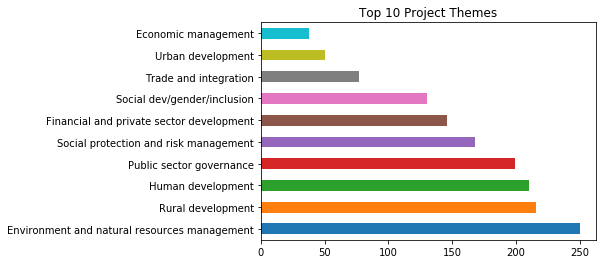

In [17]:
data.code.map(codes_map).value_counts().head(10).plot(kind='barh',title='Top 10 Project Themes')
plt.show()

In [23]:
# Method 2
# # Make dataframe out of the json file for debugging purposes
json_df = pd.read_json('Desktop/Springboard/5.2 data_wrangling_json/data/world_bank_projects.json')

# # Subset dataframe of our interest 
test_df = json_df[['_id','countryname','theme_namecode','mjtheme','mjtheme_namecode','mjthemecode']]
test_df.head()

# # Data Exploration
# cols = json_df.columns
# for i in cols:
#     print(i)

# Column with values in list
# json_df[['mjtheme']]

# # # Main Question
# # flatten out json files using json raw data
with open('Desktop/Springboard/5.2 data_wrangling_json/data/world_bank_projects.json') as file: 
    data = json.load(file)

# my code takes keyword arguments / example above takes positional arguments 
flat_json = json_normalize(data, record_path='mjtheme_namecode', meta=['countryname'])

# # Data Exploration for flat_json
# len(flat_json['code'].unique())  # 11 unique values (for mjtheme code)
# flat_json[flat_json['code']=='1'].shape  # number of rows for which the 'code' column is '1'

# # Return the top 10 codes 
value_counts = flat_json['code'].value_counts()
value_counts

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
3      15
Name: code, dtype: int64

### Question 3
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [24]:
import numpy as np

# # Main Question
# # flatten out json files using json raw data
with open('Desktop/Springboard/5.2 data_wrangling_json/data/world_bank_projects.json') as file: 
    data = json.load(file)

flat_json = json_normalize(data, record_path='mjtheme_namecode', meta=['countryname'])

# To fill in the missing values of the 'name' column, replace the empty strings "" with np.nan
# values and fill the entries in (using .fillna() method) after sorting the columns
sorted_df = flat_json.sort_values(by=['code','name'],ascending=[True, True])
sorted_df.name.replace('', np.nan, inplace=True)
# check that cell entry is nan: 
# print(sorted_df.iloc[0]['name'])

## fill in name column using 'backfill' method -> thus must sort 'name' column in ascending order
## so that the nan values appear first 
sorted_df = sorted_df.fillna(method='bfill')
sorted_df

# # make a mapping dictionary using 'code' column as key and 'name' column as value: 
# method: by zipping two lists together (from the dataframe columns) to avoid using for loops! 
mapping_dict = dict(zip(sorted_df.code, sorted_df.name))

# # Return the top 10 codes with code + theme + counts 
value_counts = flat_json['code'].value_counts()
df_value_counts = pd.DataFrame(value_counts).reset_index()
df_value_counts.columns = ['theme_code','counts']
df_value_counts['theme'] = df_value_counts['theme_code'].map(mapping_dict)
# rearranging the columns 
df_final = df_value_counts[['theme_code','theme','counts']]
df_final

,theme_code,theme,counts
0,11,Environment and natural resources management,250
1,10,Rural development,216
2,8,Human development,210
3,2,Public sector governance,199
4,6,Social protection and risk management,168
5,4,Financial and private sector development,146
6,7,Social dev/gender/inclusion,130
7,5,Trade and integration,77
8,9,Urban development,50
9,1,Economic management,38


#### Answer:¶
Top 10 themes are

1. Environment and natural resources management - 250 times
2. Rural development - 216 times
3. Human development - 210 times
4. Public sector governance - 199 times
5. Social protection and risk management - 168 times
6. Financial and private sector development - 146 times
7. Social dev/gender/inclusion - 130 times
8. Trade and integration - 77 times
9. Urban development - 50 times
10. Economic management - 38 times